<a href="https://colab.research.google.com/github/PhaTanVu/AI_W9_31-03/blob/main/Fashion_MNIST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf 
from tensorflow import keras 
from keras.datasets import fashion_mnist
import matplotlib.pyplot as plt 
import numpy as np 

In [2]:
(train_images, train_labels),(test_images, test_labels) = fashion_mnist.load_data()

4422102/4422102 [==============================] - 0s 0us/step


In [3]:
train_images.shape 

(60000, 28, 28)

In [4]:

test_images.shape

(10000, 28, 28)

In [5]:
train_labels.shape 

(60000,)

In [6]:
test_labels.shape

(10000,)

In [8]:
class_name = [ "T-shir/top" ,"Trouser", "Pullover", "Dress", "Coat", "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

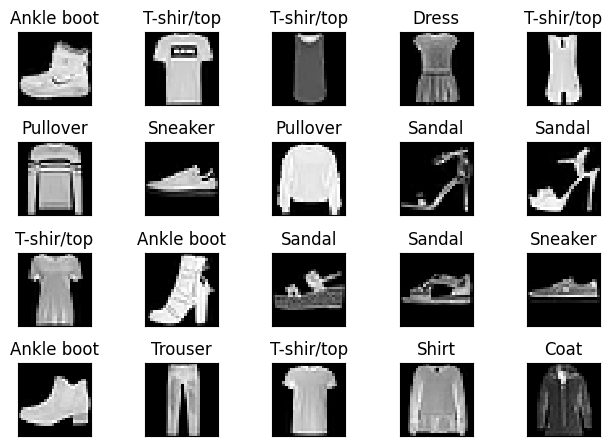

In [11]:
class_name = [ "T-shir/top" ,"Trouser", "Pullover", "Dress", "Coat", "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]
for i in range(20): 
  plt.subplot(4,5,i+1)
  plt.tight_layout()
  plt.imshow(train_images[i], cmap = 'gray', interpolation = 'none')
  plt.title('{}'.format(class_name[train_labels[i]]))
  plt.xticks([])
  plt.yticks([])

In [15]:
from keras.models import Sequential #Sequnetial: la mang ANN, lop nay nos ke tiep nhau (mo ta mang ANN theo tung lop)
from keras.layers import Dense  # Dense = full_connectied : ket noi day du theo cac te bao 

model = Sequential()
model.add(Dense(512, activation = 'relu', input_shape = (28*28,), name = "layer_1"))  # them mot lop: add, them mot full_connectied: Dense, 512: so noron duoc them 
model.add(Dense(256, activation = 'relu', input_shape = (28*28,), name = "layer_2")) 
model.add(Dense(128, activation = 'relu', input_shape = (28*28,), name = "layer_3")) 
model.add(Dense(10, activation = 'softmax', name = "Layer")) 
model.summary() 

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 layer_1 (Dense)             (None, 512)               401920    
                                                                 
 layer_2 (Dense)             (None, 256)               131328    
                                                                 
 layer_3 (Dense)             (None, 128)               32896     
                                                                 
 Layer (Dense)               (None, 10)                1290      
                                                                 
Total params: 567,434
Trainable params: 567,434
Non-trainable params: 0
_________________________________________________________________


In [14]:
train_images = train_images.reshape((60000,28*28))  #reshape: chuyen anh 2 chieu sang anh 1 chieu 
train_images = train_images.astype('float32')/255
train_images.shape   

(60000, 784)

In [16]:
test_images = test_images.reshape((10000,28*28))  #reshape: chuyen anh 2 chieu sang anh 1 chieu 
test_images = test_images.astype('float32')/255
test_images.shape

(10000, 784)

In [17]:
from keras.utils import to_categorical 
train_labels = to_categorical(train_labels,10)
test_labels = to_categorical(test_labels,10)

In [18]:
train_labels.shape

(60000, 10)

In [20]:
test_labels.shape   

(10000, 10)

In [21]:
#compile
model.compile(optimizer = 'rmsprop', loss = 'categorical_crossentropy', metrics = ['accuracy'])  #chon bo toi uu, danh gia do mat mat, do chinh xac  
#train
model.fit(train_images, train_labels, epochs = 10, batch_size = 128 ) # epochs: so lan hoc, bath_size: so du lieu moi lan hoc

Epoch 1/10
469/469 [==============================] - 10s 15ms/step - loss: 1.3154 - accuracy: 0.4990
Epoch 2/10
469/469 [==============================] - 9s 19ms/step - loss: 0.8033 - accuracy: 0.6924
Epoch 3/10
469/469 [==============================] - 14s 31ms/step - loss: 0.6755 - accuracy: 0.7488
Epoch 4/10
469/469 [==============================] - 10s 21ms/step - loss: 0.5836 - accuracy: 0.7817
Epoch 5/10
469/469 [==============================] - 9s 19ms/step - loss: 0.5296 - accuracy: 0.8055
Epoch 6/10
469/469 [==============================] - 8s 17ms/step - loss: 0.4916 - accuracy: 0.8203
Epoch 7/10
469/469 [==============================] - 8s 17ms/step - loss: 0.4648 - accuracy: 0.8302
Epoch 8/10
469/469 [==============================] - 7s 15ms/step - loss: 0.4410 - accuracy: 0.8390
Epoch 9/10
469/469 [==============================] - 8s 17ms/step - loss: 0.4209 - accuracy: 0.8459
Epoch 10/10
469/469 [==============================] - 9s 19ms/step - loss: 0.4040 - acc

In [22]:
#evaluate
test_loss , test_acc = model.evaluate(test_images, test_labels)
print('Do mat mat :', test_loss)
print('Do chinh xac :', test_acc)

313/313 [==============================] - 1s 4ms/step - loss: 74.3299 - accuracy: 0.7035
Do mat mat : 74.32991790771484
Do chinh xac : 0.703499972820282


1/1 [==============================] - 0s 105ms/step


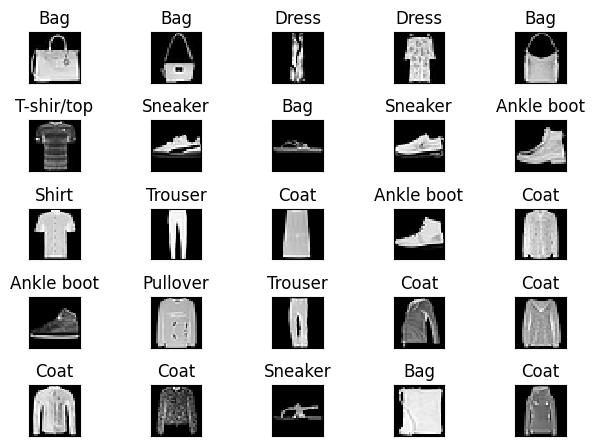

In [23]:
x_images = test_images[30:55]
pred = np.argmax(model.predict(x_images), axis=-1)
x_images = np.reshape(x_images, (25,28,28,1))

for i in range(25): 
  plt.subplot(5,5,i+1)
  plt.tight_layout()
  plt.imshow(x_images[i], cmap = 'gray', interpolation = 'none')
  plt.title('{}'.format(class_name[pred[i]]))
  plt.xticks([])
  plt.yticks([])